# Forecasting XAU/USD Exchange Rates

## Introduction

### Background
The XAU/USD exchange rate represents the value of gold (XAU) in terms of the US Dollar (USD). Gold is a precious metal that has long been considered a safe-haven asset and is widely traded in the financial markets. Understanding and predicting movements in the XAU/USD exchange rate is of significant interest to investors, traders, and financial institutions.

### Project Objective
This project aims to leverage data science and predictive modeling techniques to forecast future XAU/USD exchange rates. By analyzing historical data and using machine learning algorithms, we intend to build a model that can provide valuable insights into potential price movements. This forecast can assist traders and investors in making informed decisions in the volatile world of financial markets.

### Dataset
We will utilize a historical dataset of XAU/USD exchange rates. The dataset includes:

- Date: The date of the exchange rate observation.
- Open Price: The opening price of XAU/USD on that date.
- Close Price: The closing price of XAU/USD on that date.
- High Price: The highest price reached during the day.
- Low Price: The lowest price reached during the day.
- Volume: The number of lots traded in a currency pair within a a day. In other words, the amount of currency bought and sold.

### Methodology
Our approach to forecasting XAU/USD exchange rates will involve the following steps:

1. Data Preprocessing: We will clean and prepare the dataset, handle missing values, and perform any necessary feature engineering.

2. Exploratory Data Analysis (EDA): We will visualize the data to gain insights into the historical trends, seasonality, and any potential patterns.

3. Feature Selection: We will select relevant features that are likely to have an impact on the exchange rate.

4. Model Selection: We will experiment with various machine learning algorithms such as time series models, regression models, and deep learning models to identify the most suitable approach for our forecasting task.

5. Model Training and Evaluation: We will train our chosen models on historical data and evaluate their performance using appropriate metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

6. Forecasting: We will use the trained model to make future predictions of XAU/USD exchange rates.

### Expected Outcomes
By the end of this project, we aim to have a reliable forecasting model that can provide short-term and long-term predictions of XAU/USD exchange rates. These predictions will be valuable for traders and investors looking to make data-driven decisions in the gold market.

### Notebook Structure
This notebook is structured as follows:
- Data Preparation and Exploration
- Feature Engineering
- Model Development and Evaluation
- Forecasting
- Conclusion and Future Work

Let's get started with the data preparation and exploration phase!


In [54]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/tmp/ipykernel_25526/1155928800.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Data Exploration

In [55]:
df1 = pd.read_csv('XAU_USD_Historical_Data_2000_2010.csv', parse_dates=[0])
df2 = pd.read_csv('XAU_USD_Historical_Data_2010_2023.csv', parse_dates=[0])

In [56]:
dfs = [df2, df1]
df = pd.concat(dfs)

In [57]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6168 entries, 0 to 2603
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      6168 non-null   datetime64[ns]
 1   Price     6168 non-null   object        
 2   Open      6168 non-null   object        
 3   High      6168 non-null   object        
 4   Low       6168 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  6168 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 385.5+ KB


#### We notice that:
- All nummerical various aren't treated as floats, because of the `,`
- Date should be treated as the index
- Vol. column looks suspicious, we need to investigate a bit more with it.
- Change % need to be float as well (remove `%`).

In [59]:
df.index = df.Date # here we changed the index

In [60]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
Date,,,,,,,
2010-01-01,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


In [61]:
df.drop('Date', inplace=True, axis=1) # dropped Date since it became the index

In [62]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",NaN,0.10%
2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",NaN,2.10%
2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",NaN,-0.12%
2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",NaN,1.77%
2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",NaN,-0.58%


Next we're casting the types of the columns

In [63]:
for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].map(lambda row : float(row.replace(',', '')))

In [64]:
df['Change %'] = df['Change %'].map(lambda x: float(x.replace('%', '')))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6168 entries, 2010-01-01 to 2000-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     6168 non-null   float64
 1   Open      6168 non-null   float64
 2   High      6168 non-null   float64
 3   Low       6168 non-null   float64
 4   Vol.      0 non-null      float64
 5   Change %  6168 non-null   float64
dtypes: float64(6)
memory usage: 337.3 KB


Now all columns have the correct type.
Next we'll check whats wrong with `Vol.`

In [66]:
df['Vol.'].isna().sum()

6168

So the whole column is null, maybe the source doesn't have such data, or due to the decentralized and fragmented nature of the market, the lack of transparency, and the reliance on price-based indicators.

In [67]:
df.drop(columns=['Vol.'], inplace=True, axis=1) # We drop it 

In [68]:
df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2010-01-01,1097.35,1097.25,1097.90,1097.05,0.10
2010-01-04,1120.40,1096.25,1123.80,1093.45,2.10
2010-01-05,1119.05,1121.30,1128.10,1115.25,-0.12
2010-01-06,1138.90,1118.40,1140.60,1116.00,1.77
2010-01-07,1132.30,1138.20,1139.15,1128.60,-0.58


We almost forgot to check if we have duplicates, let's see:

In [69]:
df.duplicated().sum()

1

In [70]:
df[df.duplicated()]

,Price,Open,High,Low,Change %
Date,,,,,
2010-01-01,1097.35,1097.25,1097.9,1097.05,0.1


It looks like both csv files had this record so that's why it got duplicated when we merged them.

In [71]:
df.index.is_monotonic_decreasing

False

In [72]:
df.index.is_monotonic_increasing

False

So the index isn't sorted

In [73]:
df = df.sort_index()

In [74]:
df.index.is_monotonic_increasing

True

## Correlation

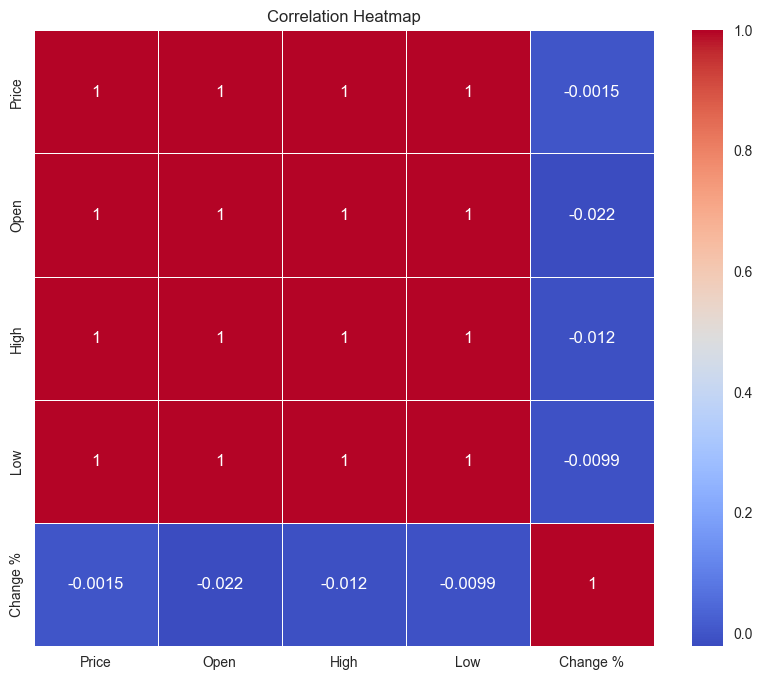

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the data
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


- As we can see, all of the features [] are highly correlated, so predicting one of them will be enough. So we'll just focus on the closing `Price`.
- Change percentage is originally based on today and yesterday price, we won't need it since in modelling we'll trying different values for lag so there's no need to include this derived value.


In [76]:
df = df['Price']

In [77]:
def display_plot(data, title):
    data.plot(
              figsize=(20,7),
              legend = True,
              alpha = 0.7,
             )
    plt.title(f'{title}', fontsize="xx-large")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize="xx-large")
    plt.show()

## Looking into data interval

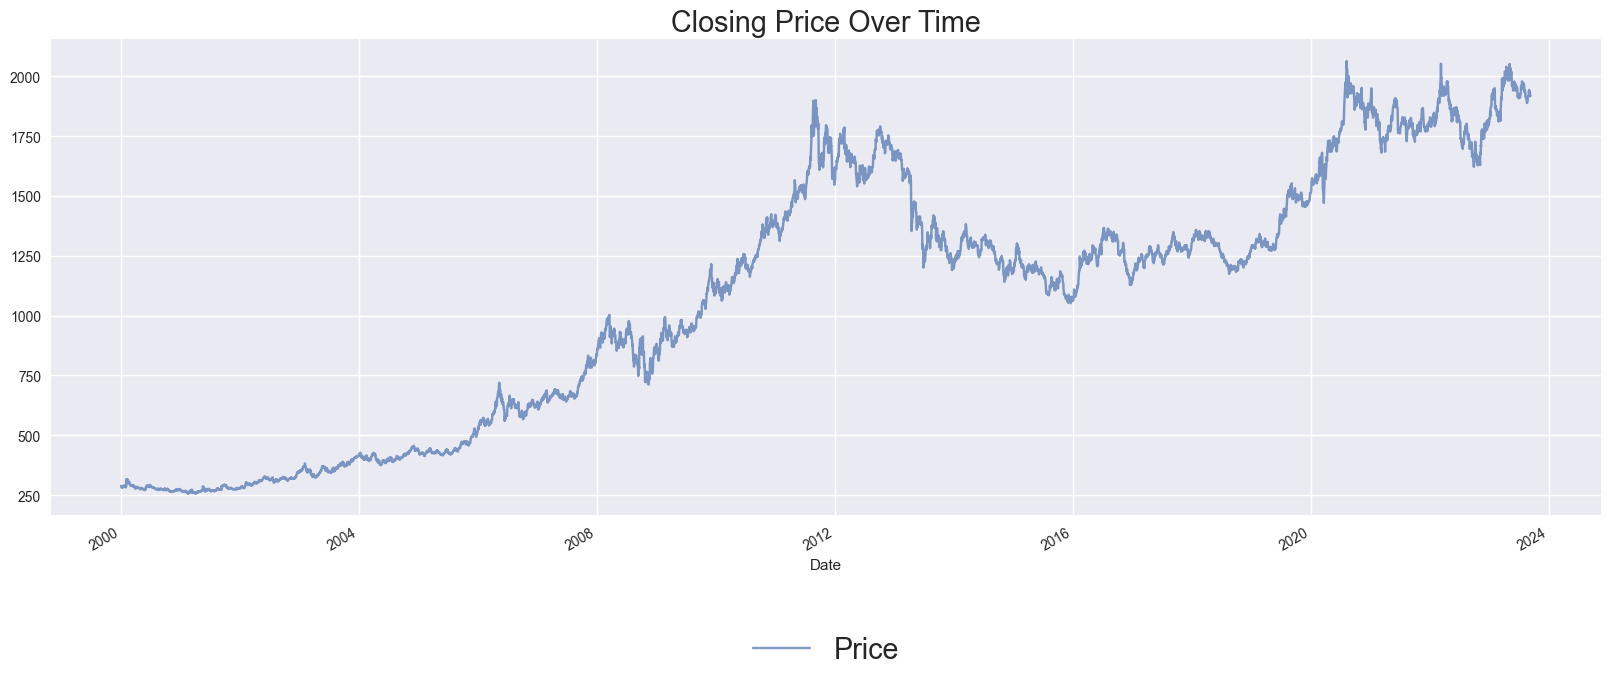

In [78]:
display_plot(df, 'Closing Price Over Time')

In [79]:
print(f"Max date: {df.index.max()}")
print(f"Min date: {df.index.min()}")

Max date: 2023-09-07 00:00:00
Min date: 2000-01-03 00:00:00


## Data Size and Range

The dataset we are working with spans a considerable 23-year range, which provides us with a substantial historical perspective on XAU/USD exchange rates. However, for the purposes of our analysis and forecasting, it's essential to consider the relevance of all this historical data.

## Excluding Expired Data

Given the extensive time frame, it's reasonable to assume that market conditions and dynamics may have significantly evolved over this period. Therefore, to ensure that our forecasting model is based on the most recent and relevant information, we plan to exclude expired data.

By "expired data," we refer to periods that are significantly distant in the past and may no longer be representative of current market conditions. Excluding such data can help us focus on recent trends and behaviors that are more likely to be informative for our forecasting model.

## So what range will we pick?

We can clearly see that the gold prices went wild the period after the financial crisis in 2008 till 2012, same thing happened in 2020 due to corona pendamic. So we'll consider using data after 2020 since it looks more relevant to todays prices and have similar characteristics 

In [93]:
df = df[df.index.year > 2020]

## Next we'll assess data completeness:

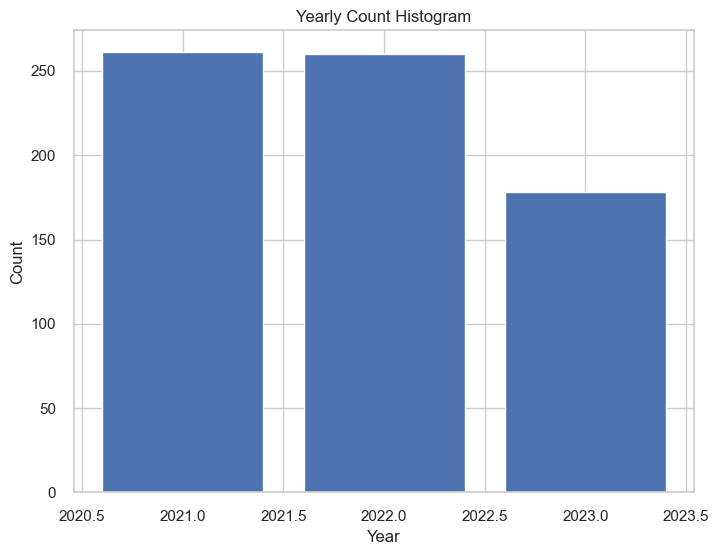

In [94]:
# Group by year and count occurrences
year_counts = df.index.year.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Yearly Count Histogram')
plt.show()

In [95]:
year_counts

2021    261
2022    260
2023    178
Name: Date, dtype: int64

We can see that each year is missing about 100 years. which is approximately 2 days each week. After doing some resarch we found that gold does adhere to normal holiday market closures.

In [96]:
days_freq = df.index.day_of_week.value_counts().sort_index()
days_freq

0    140
1    140
2    140
3    140
4    139
Name: Date, dtype: int64

We clearly don't have any records in Saturdays and Sundays.

# Stationarity of XAU/USD Time Series

## Understanding Stationarity

Before diving into time series decomposition, it's crucial to assess the stationarity of the XAU/USD exchange rate data. Stationarity is a fundamental concept in time series analysis and refers to the statistical properties of a time series remaining constant over time. In essence, it means that the mean, variance, and autocorrelation structure of the data do not change with time.

## Importance of Stationarity

Why is stationarity important? Stationary time series data is easier to model and analyze because it exhibits consistent patterns and behaviors. Key advantages of working with stationary data include:

- **Predictability**: Stationary data tends to be more predictable, making it suitable for forecasting models.

- **Statistical Validity**: Many time series models assume stationarity for valid statistical inferences.

- **Simpler Models**: Stationary data often allows for the use of simpler models, leading to more interpretable results.


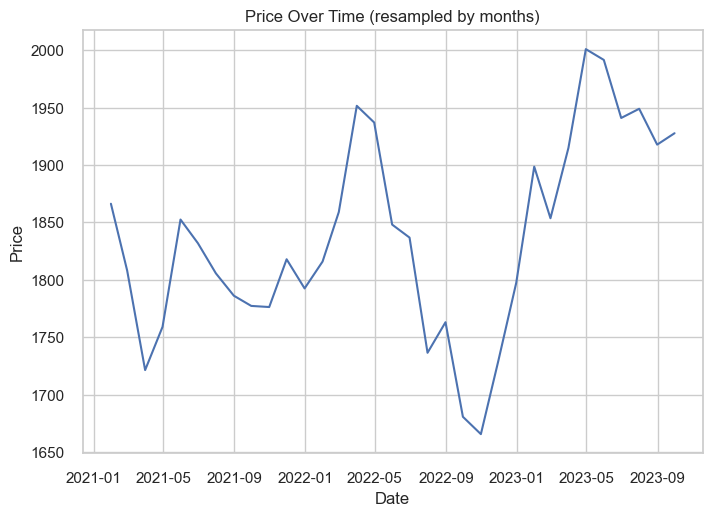

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

weekly_mean_close = df.resample('M').mean()

sns.set(style="whitegrid")

fig, ax = plt.subplots()

sns.lineplot(data=weekly_mean_close, ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Price Over Time (resampled by months)")

plt.show()

The data has a very clear trend which is enough to classify this data as **non-stationary**, but as a bonus we'll try Augmented Dickey-Fuller Test (ADF) stationarity check:

In [98]:
from statsmodels.tsa.stattools import adfuller


def check_stationarity(series, name):
    
    result = adfuller(series.values)
    print(f'\n    Augmented Dickey-Fuller Test on {name}', "\n   ", '-'*40)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32m    Stationary\u001b[0m")
    else:
        print("\x1b[31m    Non-stationary\x1b[0m")
    print('    ','-'*40)

In [99]:
check_stationarity(df, 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -2.223123
p-value: 0.197960
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
    Non-stationary
     ----------------------------------------


So we'll make the data stationary then proceed with next steps, the first method we'll try is **differencing**:

In [100]:
df_diff = df.diff().dropna()

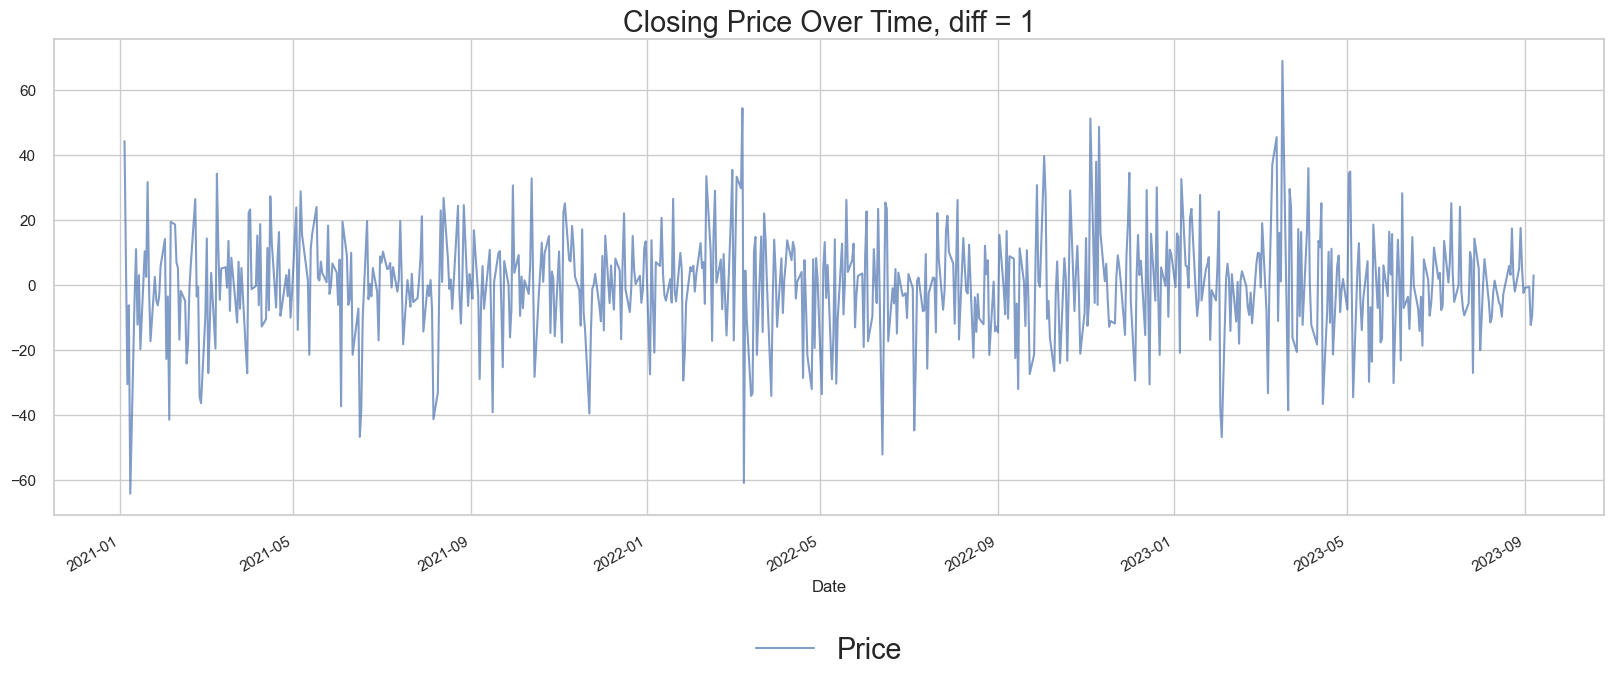

In [101]:
display_plot(df_diff, 'Closing Price Over Time, diff = 1')

Well now this looks more stationary-like, let's confirm it by using ADF statinarity check:

In [102]:
check_stationarity(df_diff, 'Price')


    Augmented Dickey-Fuller Test on Price 
    ----------------------------------------
ADF Statistic: -20.726672
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
    Stationary
     ----------------------------------------


# Time Series Decomposition

## Introduction to Decomposition

Time series decomposition is a fundamental technique used in the analysis of time-based data such as the XAU/USD exchange rates. It allows us to break down a time series into its underlying components, which often include:

1. **Trend Component**: This represents the long-term movement or trend in the time series. Identifying trends is crucial for understanding the overall direction in which the exchange rate is heading.

2. **Seasonal Component**: Many time series data, including financial data, exhibit repeating patterns or seasonality. The seasonal component captures these periodic fluctuations, such as daily, weekly, or yearly patterns.

3. **Residual (Error) Component**: The residual component represents the noise or randomness in the data that cannot be explained by the trend or seasonality. Analyzing the residuals can help us identify irregular or unexpected events.

## Purpose of Decomposition

In the context of our XAU/USD exchange rate data analysis, time series decomposition serves several important purposes:

- **Pattern Recognition**: It allows us to identify recurring patterns and trends within the exchange rate data, which can provide valuable insights for forecasting.

- **Anomaly Detection**: Decomposition helps in detecting unusual events or outliers in the data by comparing observed values to what is expected based on historical trends and seasonality.

- **Modeling**: The decomposed components can be used as inputs to various forecasting models, providing a more structured approach to time series forecasting.

- **Data Understanding**: By breaking down the data into its constituent parts, we gain a deeper understanding of the underlying dynamics of the XAU/USD exchange rate.

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_timeseries(sales, StoreType, period):

    fig, axes = plt.subplots(3, 1, sharex=True, sharey=False)
    fig.set_figheight(12)
    fig.set_figwidth(15)

    decomposition = seasonal_decompose(sales, model='additive', period=period)  # Set the specified period

    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid

    axes[2].plot(estimated_residual, 'r', label='Residuals')
    axes[2].legend(loc='upper left')

    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left')

    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left')

    plt.title(f'Decomposition Plots (Period={period})')  # Include the specified period in the title
    plt.show()


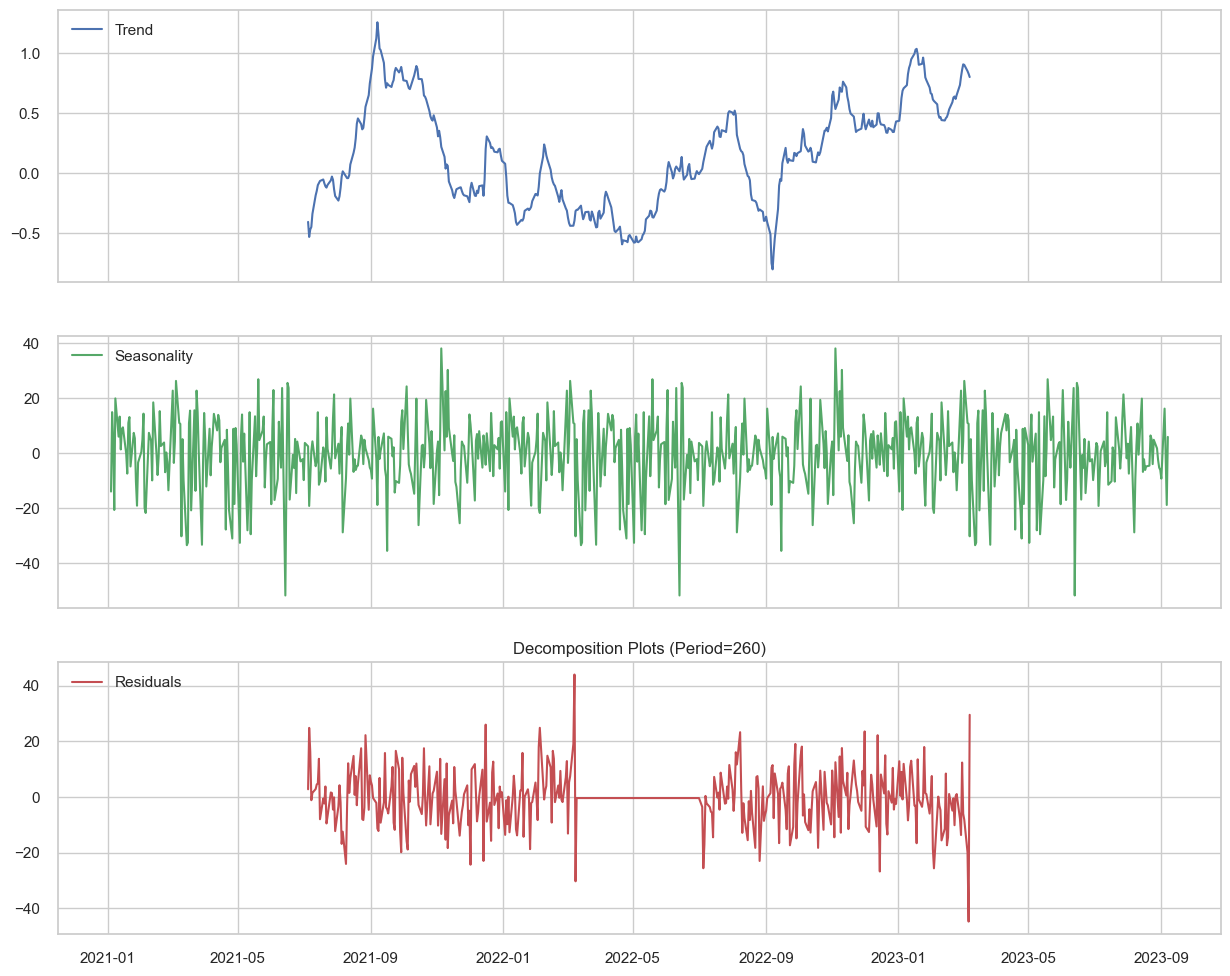

In [116]:
plot_timeseries(df_diff,'Price', 260) # for one year

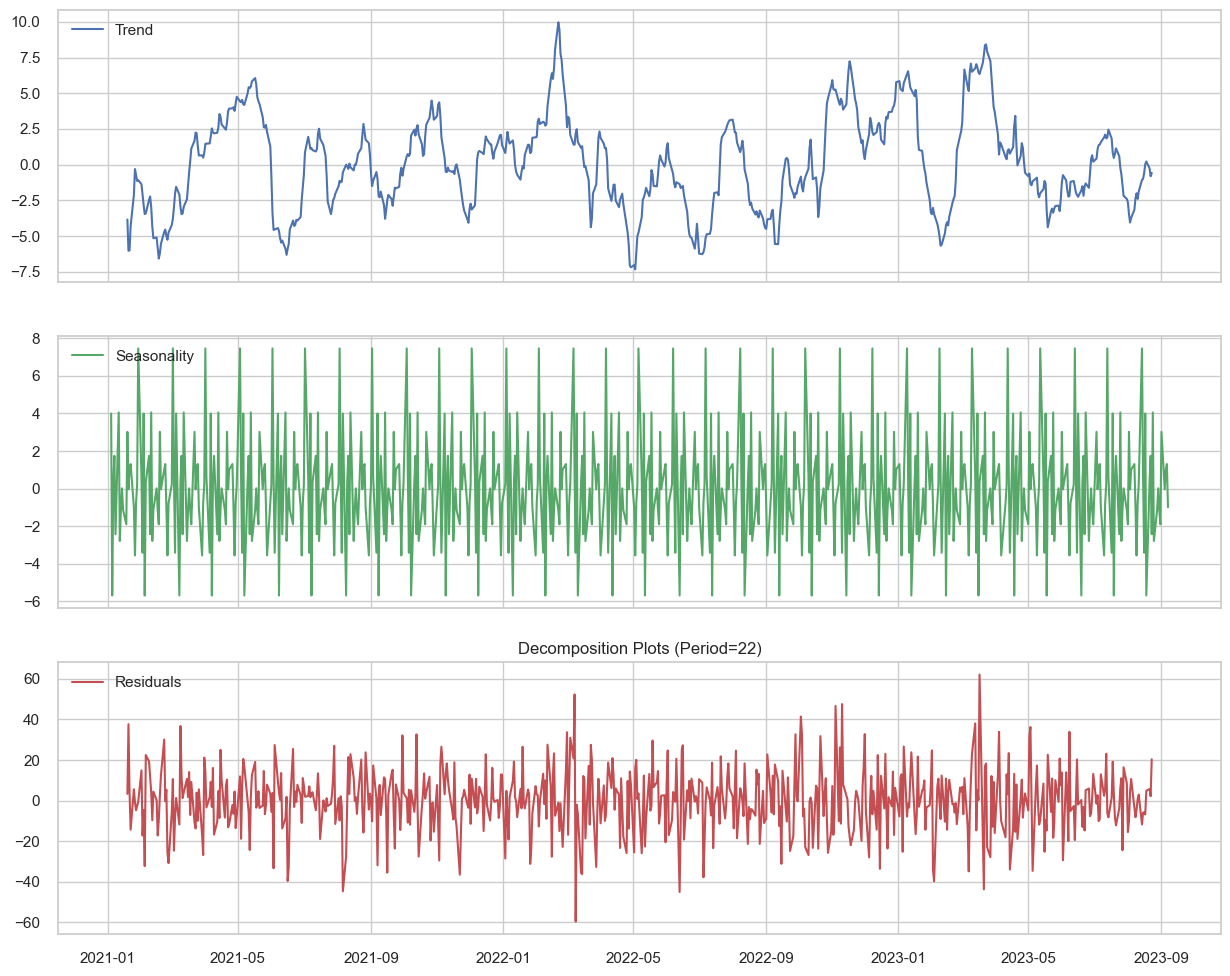

In [117]:
plot_timeseries(df_diff,'Price', 22) # for one month 

The best season  we've observed is the yearly season, because the greatest seasonality range to trend range wsas observed when we took a period of one year (260 working days days), which means that the yearly season is more predictable. Also the residuals for the yearly season are closer to zero (more stable) that the monthly ones.

In [127]:
test_date = '2023-06-01'
train_data, test_data = df_diff[df_diff.index < test_date], df_diff[df_diff.index >= test_date]
train_data.tail()

Date
2023-05-25   -16.67
2023-05-26     5.99
2023-05-29    -3.49
2023-05-30    16.30
2023-05-31     3.16
Name: Price, dtype: float64

In [128]:
test_data.shape

(71,)

The last 2 months are preserved for testing

In [120]:
from statsmodels.tsa.stattools import acf,pacf

# Autocorrelation function to make ACF and PACF graphs
def draw_auto_corr(series):
    lag_acf = acf(series,nlags=3000)
    lag_pacf = pacf(series,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(series)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(series)),linestyle='--',color ='red')
    plt.title('ACF')

    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(series)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(series)),linestyle='--',color ='red')
    plt.title('PACF')


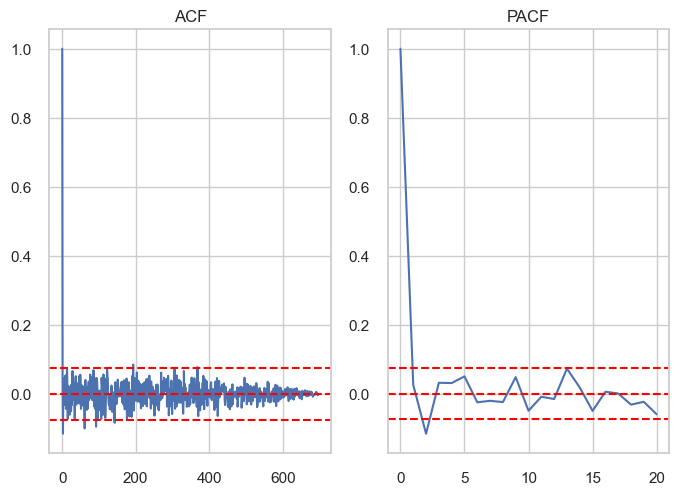

In [122]:
draw_auto_corr(df_diff)

In [125]:
lag_acf = acf(df_diff,nlags=3000)
lag_pacf = pacf(df_diff,nlags=20, method='ols')
print(f"Threshold: {1.96/np.sqrt(len(df_diff))}")
print(lag_acf[:5])
print('----------')
print(lag_pacf[:5])

Threshold: 0.07418709408223753
[ 1.          0.02591366 -0.11511575  0.02514775  0.04464253]
----------
[ 1.          0.02591384 -0.11589373  0.03168791  0.03085856]


From the prev. steps we found out that: q = 1904, p = 2

In [134]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import random
random.seed(42)

train = train_data
test = test_data

validation_length = len(test)

import itertools

# Define parameter combinations to try
p_values = [260]
d_values = [1,2,3,4,5]
q_values = [0,1,2]

best_rmse = float('inf')
best_params = None
best_model = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()

        # Make predictions
        validation_start = random.randint(0, len(train) - validation_length - 1)
        validation_end = validation_start+validation_length
        predictions = model_fit.predict(start=validation_start, end=validation_end, dynamic=True)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(train[validation_start:validation_end+1], predictions))

        if rmse < best_rmse:
            best_rmse = rmse
            best_params = (p, d, q)
            best_model = model_fit

    except Exception as e:
        print(e)
        continue

print("Best RMSE:", best_rmse)
print("Best Parameters (p, d, q):", best_params)

KeyboardInterrupt: 

In [130]:
test_predictions = best_model.forecast(len(test))
rmse = np.sqrt(mean_squared_error(test, test_predictions))

In [131]:
print(rmse)

11.242533738546424


In [132]:
df1 = pd.DataFrame(test)
test_predictions.index = test.index
df1['Predicted'] = test_predictions
df1.index = test.index
df1.head()

,Price,Predicted
Date,,
2023-06-01,15.58,0.211601
2023-06-02,-30.25,0.109000
2023-06-05,13.82,0.105430
2023-06-06,1.40,0.105306
2023-06-07,-23.22,0.105302


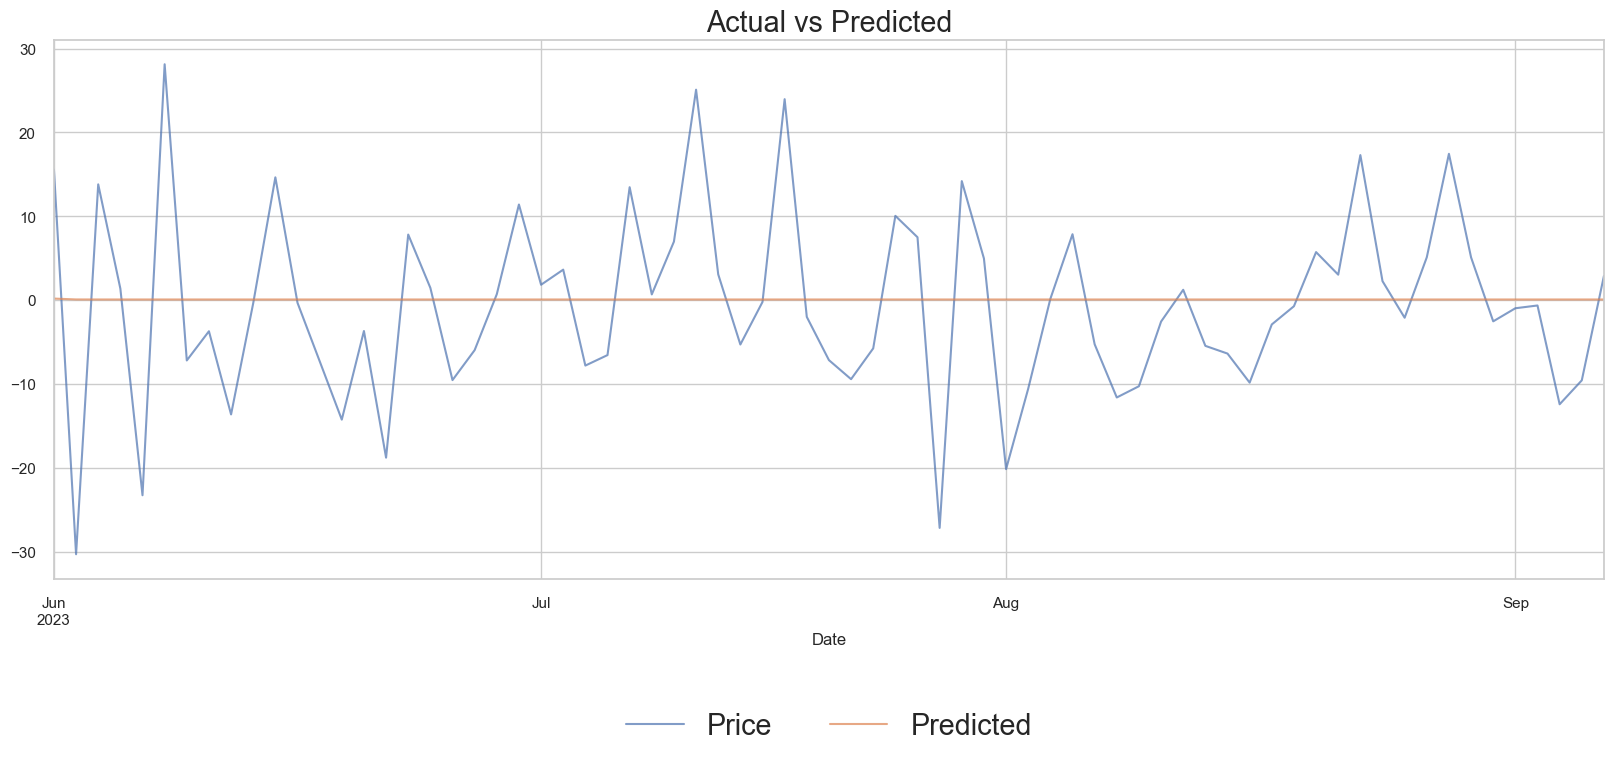

In [133]:
display_plot(df1, 'Actual vs Predicted')

This model says: the best prediction for `tomorrow's price` is `yesterday's price`

#### Last note: we haven't considered data expiration yet

In [ ]:
test_predictions = model_fit.forecast(len(test))
rmse = np.sqrt(mean_squared_error(test, test_predictions))

In [ ]:
df2 = pd.DataFrame(test)
test_predictions.index = test.index
df2['Predicted'] = test_predictions
df2.index = test.index
df2.head()

In [ ]:
display_plot(df2, 'Actual vs Predicted')